In [48]:
#importing libraries
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [49]:
#  reading csv file
boston_dataset = pd.read_csv("boston.csv")

In [50]:
# loading data into pandas dataframe
X = pd.DataFrame(boston_dataset[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']], columns =['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat'])
Y = boston_dataset['medv']

In [51]:
# splitting data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
trindex=list(X_train.index)
teindex=list(X_test.index)

# converting into array
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test)
X_test1=X_test

In [52]:
# printing shape of train set
print("Shape of X_train is: ",X_train.shape) 
print("Shape of Y_train is: ",Y_train.shape)
print("Shape of X_test is: ",X_test.shape)
print("Shape of Y_test is: ",Y_test.shape)

Shape of X_train is:  (392, 13)
Shape of Y_train is:  (392,)
Shape of X_test is:  (98, 13)
Shape of Y_test is:  (98,)


In [53]:
# creating object of StandardScaler for standardization
scaler=StandardScaler()
# fitting object in X_train
scaler.fit(X_train) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [54]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [55]:
dummy=(np.ones([392,1],dtype=int))
#concatenating 1's for intercept calculation
X_train=np.concatenate((dummy,X_train),axis=1)
dummy_test=(np.ones([98,1],dtype=int))
X_test=np.concatenate((dummy_test,X_test),axis=1)


In [56]:
print("\n1. Stochastic Gradient Descent")
print("2. Batch Gradient Descent")
print("3. Mini-Batch Gradient Descent")


1. Stochastic Gradient Descent
2. Batch Gradient Descent
3. Mini-Batch Gradient Descent


In [77]:
ch=eval(input("\nEnter your choice from above "))
epochs=350


Enter your choice from above 3


In [78]:
#Mean-Squared-Error loss
def calculate_error(theta):
    error=0
    for i in range(Y_train.shape[0]):
        error+=np.square(np.dot(theta.transpose(),X_train[i])-Y_train[i])
    mse=error/(2*Y_train.shape[0])
    return mse

In [79]:
# coefficients of features
theta=np.random.rand(14,1)

# for storing updated value of theta
temp=np.ndarray([14,1])

# learning rate
alpha=0.01 

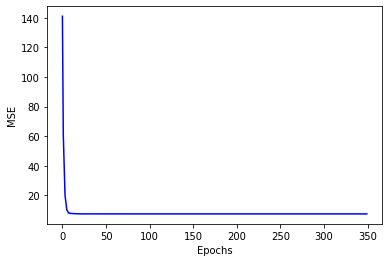

starting value of mean square error is :  [141.0056075]
reduced value of mean square error:  [7.44050495]


In [81]:
#gradient descent calculation
if ch==1:
    y=[]
    for epoch in range(epochs):
        for j in range(14):
            dif=0
            for i in range(Y_train.shape[0]):
                dif+=(np.dot(theta.transpose(),X_train[i].reshape([14,1])) - Y_train[i])*X_train[i][j]
            temp[j] = theta[j] - (alpha/392)*(add)
            theta=temp   
        y.append(calculate_error(theta))
    plt.xlabel("Epochs")
    plt.ylabel("MSE")
    x=np.arange(0,epochs)
    plt.plot(x,y,color='b')
    plt.show()
if ch==2:
    y=[]
    for epoch in range(epochs):
        for j in range(14):
            dif=0
            for i in range(Y_train.shape[0]):
                dif+=(np.dot(theta.transpose(),X_train[i].reshape([14,1])) - Y_train[i])*X_train[i][j]
            temp[j] = theta[j] - (alpha/392)*(add)
        theta=temp
        y.append(calculate_error(theta))
    plt.xlabel("Epochs")
    plt.ylabel("MSE")
    x=np.arange(0,epochs)
    plt.plot(x,y,color='b')
    plt.show()
if ch==3:
    y=[]
    batch_size=10
    batches=Y_train.shape[0]//batch_size
    for epoch in range(epochs):
        for j in range(14):
            dif=0
            for batch in range(batches):
                for i in range(batch*batch_size,batch*batch_size+batch_size):
                    dif+=(np.dot(theta.transpose(),X_train[i].reshape([14,1])) - Y_train[i])*X_train[i][j]
                temp[j] = theta[j] - (alpha/batch_size)*(add)
                theta=temp    
        y.append(calculate_error(theta))
    plt.xlabel("Epochs")
    plt.ylabel("MSE")
    x=np.arange(0,epochs)
    plt.plot(x,y,color='b')
    plt.show()
print("starting value of mean square error is : ",y[0])
print("reduced value of mean square error: ",y[(len(y)-1)])

In [82]:
#calculation of average percentage error in predicted price for train set
per=[]
for i in range(Y_train.shape[0]):
    temp=((np.abs((np.dot(theta.T,X_train[i].reshape(14,1)))-(Y_train[i])))/(Y_train[i]))*100
    per.append(temp)
avgp=sum(per)/len(per)
print("average percentage error in price prediction  of train set is: {}% ".format(avgp[0][0]))


average percentage error in price prediction  of train set is: 15.921037168392733% 


In [83]:
#calculation of average percentage error in predicted price for test set
per1=[]
for i in range(Y_test.shape[0]):
    temp=((np.abs((np.dot(theta.T,X_test[i].reshape(14,1)))-(Y_test[i])))/(Y_test[i]))*100
    per1.append(temp)
avgp1=sum(per1)/len(per1)
print("average percentage error in price prediction of test set is: {}% ".format(avgp1[0][0]))


average percentage error in price prediction of test set is: 15.640019892299991% 


In [63]:
#calculation of R2 and Root mean square for checking performance of train set on model
lis=[]
for i in range(Y_train.shape[0]):
    temp=np.dot(theta.T,X_train[i].reshape(14,1))
    lis.append(temp[0][0])
Y_train_pred=np.array(lis)

r=r2_score(Y_train,Y_train_pred)
print("value of R2 for train set is: ",r)
rmse = (np.sqrt(mean_squared_error(Y_train,Y_train_pred)))
print("value of rmse for test set is: ",rmse)


value of R2 for train set is:  0.7571863869198853
value of rmse for test set is:  3.8209178485970106


In [64]:
#calculatiom of R2 and Root mean square error for checking performance of test set on model

lis1=[]
for i in range(Y_test.shape[0]):
    temp=np.dot(theta.T,X_test[i].reshape(14,1))
    lis1.append(temp[0][0])
Y_test_pred=np.array(lis1)

r1=r2_score(Y_test,Y_test_pred)
print("value of R2 for test set is: ",r1)
rmse = (np.sqrt(mean_squared_error(Y_test,Y_test_pred)))
print("value of rmse for test set is: ",rmse)

value of R2 for test set is:  0.7925148829880575
value of rmse for test set is:  3.7595006193846623


In [65]:
import cv2

In [66]:
img1 = cv2.imread('gallery.jpg',1)
img2 = cv2.imread('hou2.jpg',1)
img3 = cv2.imread('hou1.jog.jpg',1)


In [67]:
#Predicting prices
flag=0
temp=X_test1[0:50]
df=pd.DataFrame(temp,columns=['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat'])
print(df)

        crim    zn  indus  chas    nox     rm    age     dis   rad    tax  \
0    0.19133  22.0   5.86   0.0  0.431  5.605   70.2  7.9549   7.0  330.0   
1    4.66883   0.0  18.10   0.0  0.713  5.976   87.9  2.5806  24.0  666.0   
2    0.09512   0.0  12.83   0.0  0.437  6.286   45.0  4.5026   5.0  398.0   
3    0.08244  30.0   4.93   0.0  0.428  6.481   18.5  6.1899   6.0  300.0   
4    3.67822   0.0  18.10   0.0  0.770  5.362   96.2  2.1036  24.0  666.0   
5    4.54192   0.0  18.10   0.0  0.770  6.398   88.0  2.5182  24.0  666.0   
6   11.57790   0.0  18.10   0.0  0.700  5.036   97.0  1.7700  24.0  666.0   
7    9.51363   0.0  18.10   0.0  0.713  6.728   94.1  2.4961  24.0  666.0   
8    0.03359  75.0   2.95   0.0  0.428  7.024   15.8  5.4011   3.0  252.0   
9    0.41238   0.0   6.20   0.0  0.504  7.163   79.9  3.2157   8.0  307.0   
10   0.02055  85.0   0.74   0.0  0.410  6.383   35.7  9.1876   2.0  313.0   
11   0.06211  40.0   1.25   0.0  0.429  6.490   44.4  8.7921   1.0  335.0   

In [68]:
ind=int(input("\nEnter the index no from above data for which you want to predict price: "))
price=np.dot(theta.transpose(),X_test[ind].reshape(14,1))
if(ind<20):
    flag=1
elif(ind>=20 and ind<=35):
    flag=2
else:
    flag=3
print("\nPREDICTED PRICE OF HOUSE IS: ",price[0][0])
print("ORIGINAL PRICE OF HOUSE IS : ",Y_test[ind])
print("\nimage of your house is as below")
if(flag==1):
    cv2.imshow('image1',img1)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
elif(flag==2):
    cv2.imshow('image2',img2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
elif(flag==3):
    cv2.imshow('image3',img3)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


Enter the index no from above data for which you want to predict price: 48

PREDICTED PRICE OF HOUSE IS:  21.80087986304114
ORIGINAL PRICE OF HOUSE IS :  19.7

image of your house is as below
